#### Step-by-Step

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

Load data
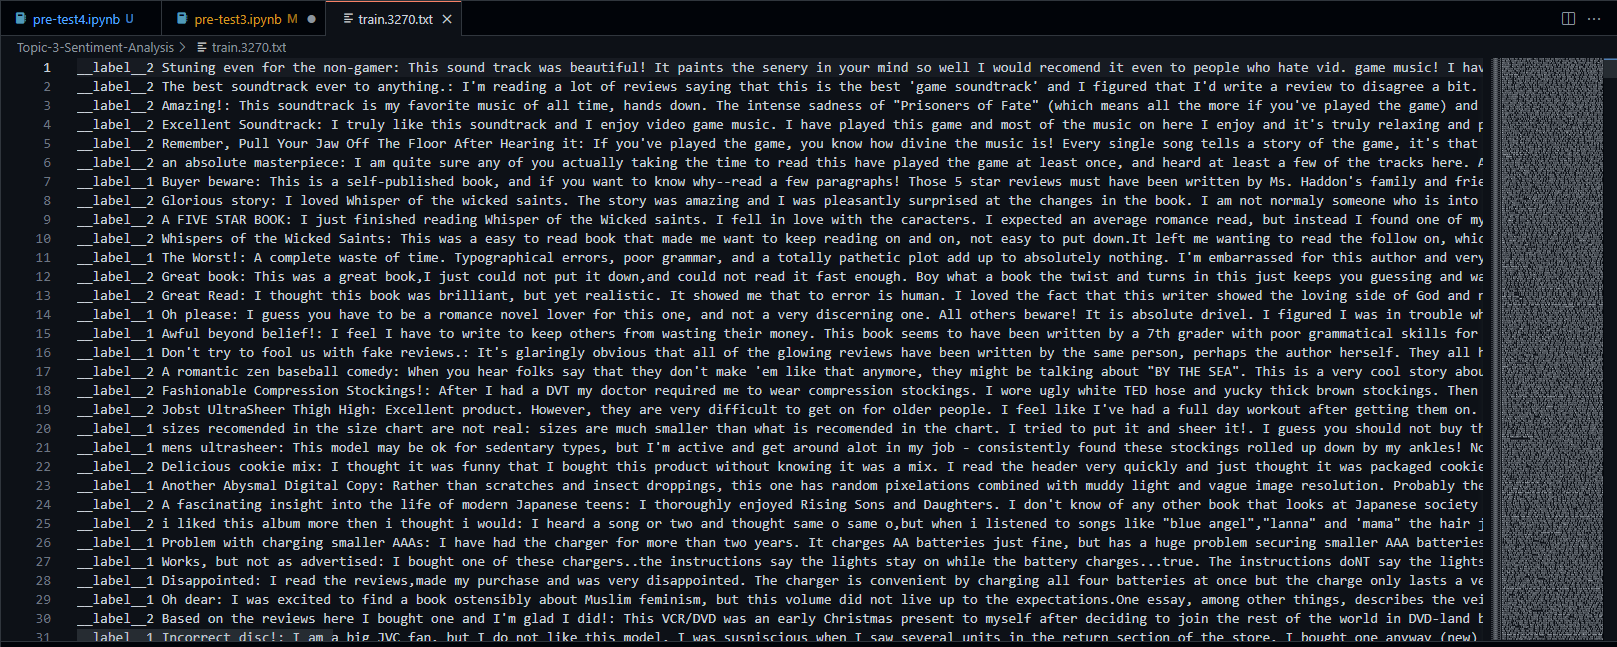

In [ ]:
# Load training data from file
def preprocess_data_from_file(filepath):
    with open(filepath, 'r') as file:
        data = file.read()
    lines = data.strip().split('\n')
    labels = []
    texts = []
    for line in lines:
        label, text = line.split(' ', 1)
        label = int(label.split('__label__')[1])
        labels.append(label)
        texts.append(text)
    return pd.DataFrame({'label': labels, 'text': texts})

train_filepath = 'train.3270.txt'
df_train = preprocess_data_from_file(train_filepath)

In [ ]:
# Initialize stop words and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Lowercase
    text = text.lower()
    
    # Remove punctuation and special characters
    text = re.sub(r'[\W_]+', ' ', text)
    
    # Tokenize and remove stop words
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return ' '.join(tokens)


df_train['text'] = df_train['text'].apply(preprocess_text)

In [ ]:
# Load training data from file and preprocess text
def preprocess_data_and_text_from_file(filepath):
    with open(filepath, 'r') as file:
        data = file.read()
    lines = data.strip().split('\n')
    labels = []
    texts = []
    for line in lines:
        label, text = line.split(' ', 1)
        
        label = int(label.split('__label__')[1])

        text = text.lower()
        text = re.sub(r'[\W_]+', ' ', text)
        tokens = text.split()
        tokens = [word for word in tokens if word not in stop_words]
        tokens = [lemmatizer.lemmatize(word) for word in tokens]
        text = ' '.join(tokens)

        labels.append(label)
        texts.append(text)
    return pd.DataFrame({'label': labels, 'text': texts})

train_filepath = 'train.3270.txt'
df_train = preprocess_data_and_text_from_file(train_filepath)

In [ ]:
# Split data into features and labels
X = df_train['text']
y = df_train['label']

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

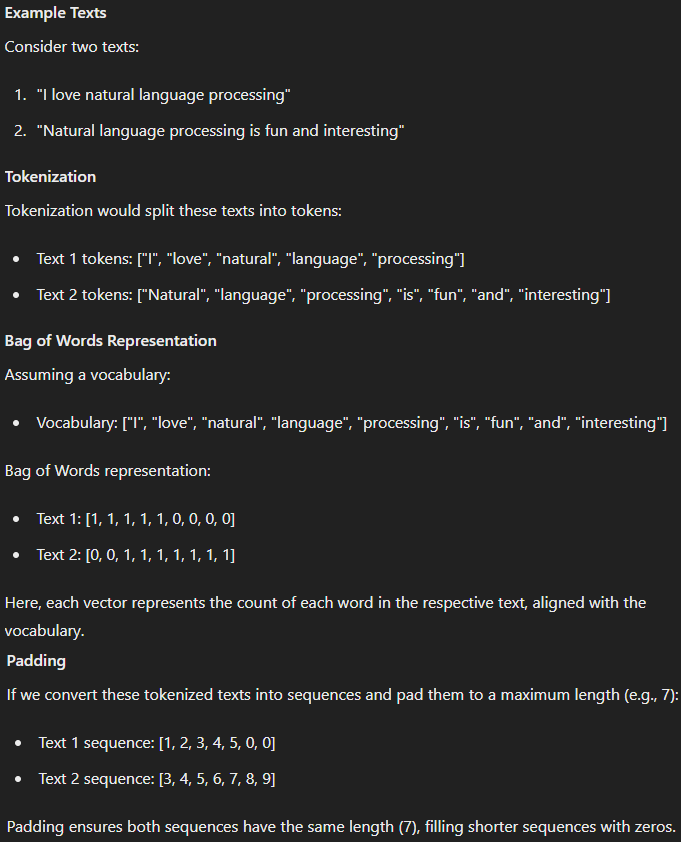

In [ ]:
# Tokenize and pad sequences
max_vocab_size = 20000
max_sequence_length = 100

tokenizer = Tokenizer(num_words=max_vocab_size)
tokenizer.fit_on_texts(X_train)

X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_val_sequences = tokenizer.texts_to_sequences(X_val)

X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length, padding='post')
X_val_padded = pad_sequences(X_val_sequences, maxlen=max_sequence_length, padding='post')

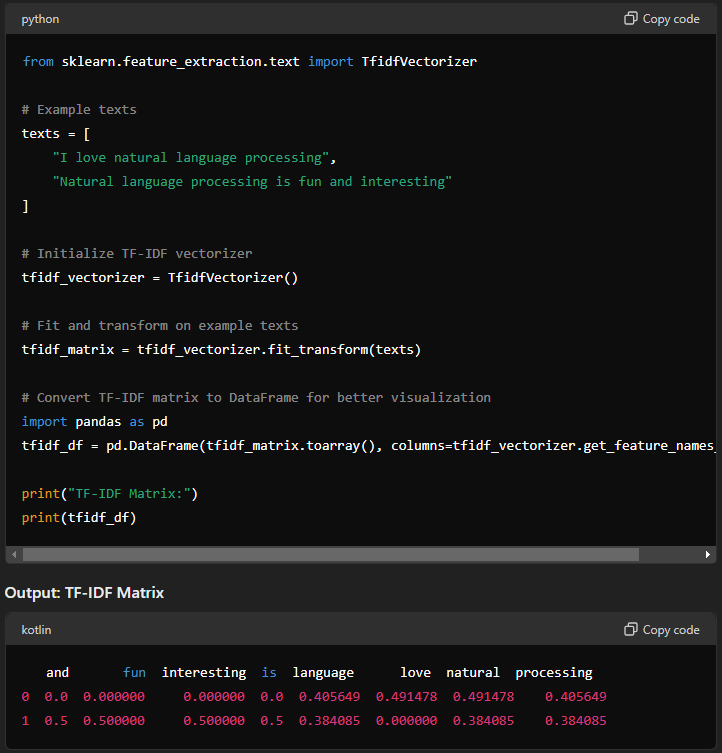

In [24]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd

# Example texts
texts = [
    "I love natural language processing",
    "Natural language processing is fun and interesting"
]

# Step 1: Tokenize and count word frequencies without removing stop words
count_vectorizer = CountVectorizer(stop_words=[])
word_count_matrix = count_vectorizer.fit_transform(texts)
word_count_df = pd.DataFrame(word_count_matrix.toarray(), columns=count_vectorizer.get_feature_names_out())

print("Word Count Matrix:")
print(word_count_df)

# Debugging: Print vocabulary to check if "I" is included
print("Vocabulary:")
print(count_vectorizer.vocabulary_)

# Step 2: Inspect the word frequencies
word_frequencies = word_count_df.sum(axis=0)
sorted_word_frequencies = word_frequencies.sort_values(ascending=False)

print("\nWord Frequencies:")
print(sorted_word_frequencies)

# Step 3: Apply TF-IDF vectorization based on inspected frequencies
# Decide the max_features value based on inspection
max_features = 10  # Example value, adjust based on your inspection

# Initialize TF-IDF vectorizer with chosen max_features
tfidf_vectorizer = TfidfVectorizer(max_features=max_features, stop_words=None)
tfidf_matrix = tfidf_vectorizer.fit_transform(texts)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

print("\nTF-IDF Matrix:")
print(tfidf_df)


Word Count Matrix:
   and  fun  interesting  is  language  love  natural  processing
0    0    0            0   0         1     1        1           1
1    1    1            1   1         1     0        1           1
Vocabulary:
{'love': 5, 'natural': 6, 'language': 4, 'processing': 7, 'is': 3, 'fun': 1, 'and': 0, 'interesting': 2}

Word Frequencies:
language       2
natural        2
processing     2
and            1
fun            1
interesting    1
is             1
love           1
dtype: int64

TF-IDF Matrix:
        and       fun  interesting        is  language      love   natural  \
0  0.000000  0.000000     0.000000  0.000000  0.448321  0.630099  0.448321   
1  0.425677  0.425677     0.425677  0.425677  0.302873  0.000000  0.302873   

   processing  
0    0.448321  
1    0.302873  


In [ ]:
# Initialize TF-IDF vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=20000)

# Fit and transform on training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform validation data
X_val_tfidf = tfidf_vectorizer.transform(X_val)

In [26]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

# Load training data from file
def preprocess_data_from_file(filepath):
    with open(filepath, 'r') as file:
        data = file.read()
    lines = data.strip().split('\n')
    labels = []
    texts = []
    for line in lines:
        label, text = line.split(' ', 1)
        label = int(label.split('__label__')[1])
        labels.append(label)
        texts.append(text)
    return pd.DataFrame({'label': labels, 'text': texts})

train_filepath = 'train.3270.txt'
df_train = preprocess_data_from_file(train_filepath)

# Initialize stop words and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[\W_]+', ' ', text)
    # Tokenize and remove stop words
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

# Apply preprocessing to the text data
df_train['text'] = df_train['text'].apply(preprocess_text)

# Split data into features and labels
X = df_train['text']
y = df_train['label']

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a method for tokenization and word frequency counting
def tokenize_and_count_freq(X_train, X_val):
    count_vectorizer = CountVectorizer(stop_words='english')
    X_train_counts = count_vectorizer.fit_transform(X_train)
    X_val_counts = count_vectorizer.transform(X_val)
    
    word_count_df = pd.DataFrame(X_train_counts.toarray(), columns=count_vectorizer.get_feature_names_out())
    print("Word Count Matrix (Training Data):")
    print(word_count_df.head())
    
    word_frequencies = word_count_df.sum(axis=0)
    sorted_word_frequencies = word_frequencies.sort_values(ascending=False)
    print("\nWord Frequencies (Training Data):")
    print(sorted_word_frequencies)
    
    return X_train_counts, X_val_counts, count_vectorizer

# Apply tokenization and word frequency counting
X_train_counts, X_val_counts, count_vectorizer = tokenize_and_count_freq(X_train, X_val)

# Define a method for TF-IDF vectorization
def apply_tfidf(X_train, X_val, max_features=None):
    tfidf_vectorizer = TfidfVectorizer(max_features=max_features, stop_words='english')
    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
    X_val_tfidf = tfidf_vectorizer.transform(X_val)
    
    return X_train_tfidf, X_val_tfidf, tfidf_vectorizer

# Apply TF-IDF vectorization
X_train_tfidf, X_val_tfidf, tfidf_vectorizer = apply_tfidf(X_train, X_val, max_features=10000)

# Optional: Print the feature names to check
print("\nFeature names (TF-IDF):")
print(tfidf_vectorizer.get_feature_names_out())

# Optional: Print the first row of the TF-IDF transformed data to check
print("\nFirst row of TF-IDF (training data):")
print(X_train_tfidf[0])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Word Count Matrix (Training Data):
   00  000  00290  007  0070412901  0072316373  008  00yeah  01  011  ...  \
0   0    0      0    0           0           0    0       0   0    0  ...   
1   0    0      0    0           0           0    0       0   0    0  ...   
2   0    0      0    0           0           0    0       0   0    0  ...   
3   0    0      0    0           0           0    0       0   0    0  ...   
4   0    0      0    0           0           0    0       0   0    0  ...   

   zort  zr  zr10  zr20  zr40  zu  zune  zydeco  zzzzzzzzzz  única  
0     0   0     0     0     0   0     0       0           0      0  
1     0   0     0     0     0   0     0       0           0      0  
2     0   0     0     0     0   0     0       0           0      0  
3     0   0     0     0     0   0     0       0           0      0  
4     0   0     0     0     0   0     0       0           0      0  

[5 rows x 13151 columns]

Word Frequencies (Training Data):
book         1935
like     